In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Make plots larger by default
warnings.filterwarnings('ignore', category=FutureWarning)


In [4]:
# Upload data
data_path = 'data/secom.data'
labels_path = 'data/secom_labels.data'

# Upload features
features = pd.read_csv(data_path, sep=' ', header=None)

# labels and timestamps
labels = pd.read_csv(labels_path, sep=' ', header=None, names=['label', 'timestamp'])

features.columns = [f'Sensor {i+1}' for i in range(features.shape[1])]

# Combine features and labels
df = pd.concat([features, labels], axis=1)
df = df.drop('timestamp', axis=1)

In [5]:
# check dataset(rows,columns)
print("Dataset Shape:", df.shape)

print("\nFirst 5 Rows:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe().T)

Dataset Shape: (1567, 591)

First 5 Rows:
   Sensor 1  Sensor 2   Sensor 3   Sensor 4  Sensor 5  Sensor 6  Sensor 7  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   Sensor 8  Sensor 9  Sensor 10  ...  Sensor 582  Sensor 583  Sensor 584  \
0    0.1242    1.5005     0.0162  ...         NaN      0.5005      0.0118   
1    0.1247    1.4966    -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436     0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882    -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031    -0.0031  ...         NaN      0.4800      0.4766   

   Sensor 585  Sensor 586  Senso

Top 10 columns with the most missing values (%):
Sensor 293    91.193363
Sensor 294    91.193363
Sensor 158    91.193363
Sensor 159    91.193363
Sensor 359    85.577537
Sensor 86     85.577537
Sensor 493    85.577537
Sensor 221    85.577537
Sensor 519    64.964901
Sensor 247    64.964901
dtype: float64


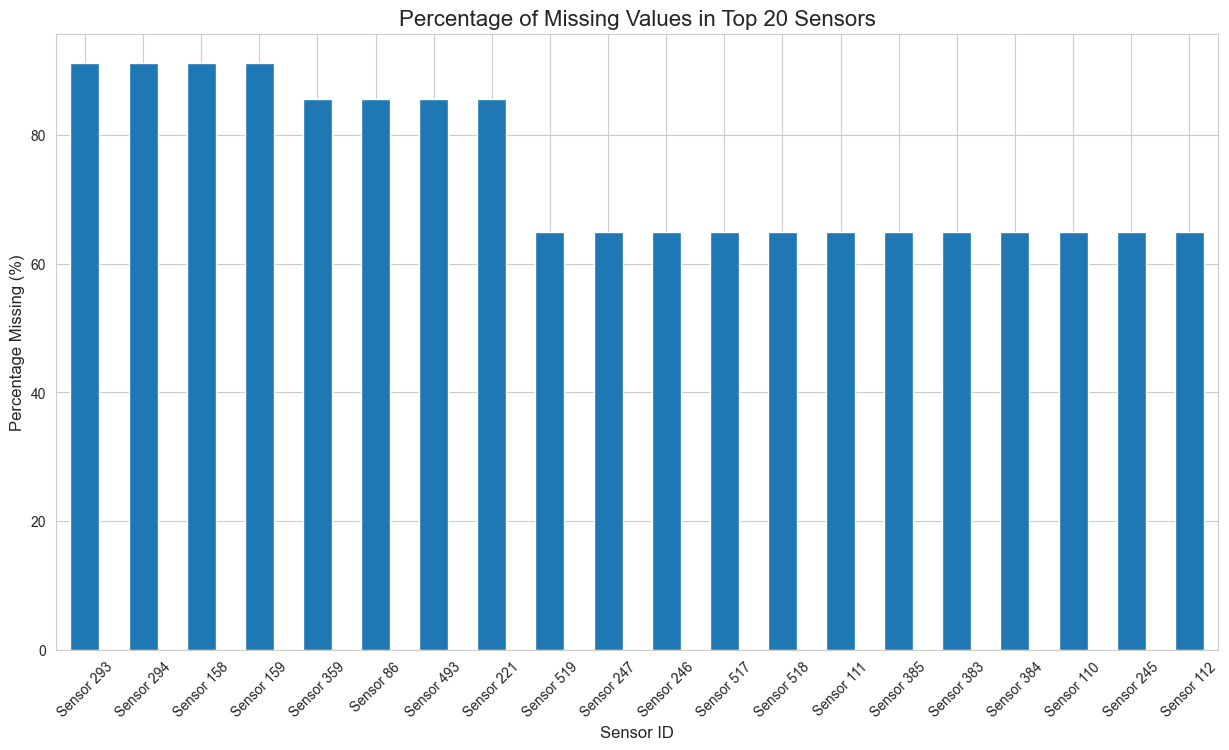

In [6]:
### missing data analysis and management

missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# top 10 columns with most missing values
print("Top 10 columns with the most missing values (%):")
print(missing_values.head(10))

# visualize missing values top 20 columns
plt.figure(figsize=(15,8))
missing_values.head(20).plot(kind='bar')
plt.title('Percentage of Missing Values in Top 20 Sensors', fontsize=16)
plt.xlabel('Sensor ID', fontsize=12)
plt.ylabel('Percentage Missing (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
df_cleaned = df.copy()

# drop columns with more than %50 missing values

cols_to_drop = missing_values[missing_values > 50].index
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

print(f"Removed {len(cols_to_drop)} columns with more than 50% missing data.")
print(f"New dataset shape: {df_cleaned.shape}")

# remaining missing values with the median of each column
# we use the median because it's robust to outliers

for col in df_cleaned.columns:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

# final check for missing values

remaining_missing = df_cleaned.isnull().sum().sum()
print(f"\nTotal remaining missing values after cleaning: {remaining_missing}")
# if output is 0, data is clean

Removed 28 columns with more than 50% missing data.
New dataset shape: (1567, 563)

Total remaining missing values after cleaning: 0


Label Distribution:
label
-1    1463
 1     104
Name: count, dtype: int64


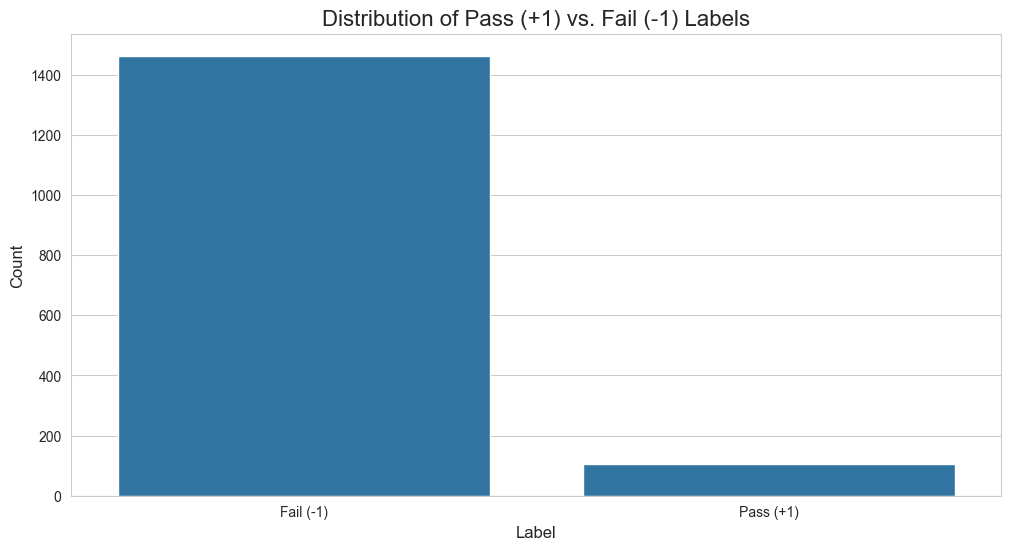


Percentage of failed products: 93.36%


In [8]:
### Analyze the distribution of the target variable 'label'
# -1 represents failed product (anomaly)
# +1 represents passed product (normal)
label_counts = df_cleaned['label'].value_counts()

print("Label Distribution:")
print(label_counts)

plt.Figure(figsize=(8, 6))
sns.countplot(x='label', data=df_cleaned)
plt.title('Distribution of Pass (+1) vs. Fail (-1) Labels',fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0,1], labels=['Fail (-1)','Pass (+1)'])
plt.show()

fail_percentage = (label_counts[-1] / len(df_cleaned)) * 100
print(f"\nPercentage of failed products: {fail_percentage:.2f}%")

In [9]:
# save clean data
df_cleaned.to_csv('data/secom_cleaned.csv', index=False)
print("Cleaned data has been saved to data/secom_cleaned.csv")

Cleaned data has been saved to data/secom_cleaned.csv
